<a href="https://colab.research.google.com/github/aselimc/PCA-LDA-tSNE-MNIST/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import scipy.io as sio
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import  matplotlib.pyplot as plt

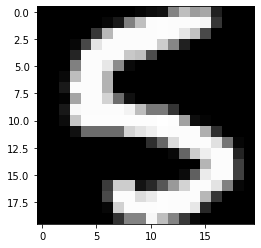

In [ ]:
test = sio.loadmat('/content/drive/MyDrive/GE461/digits.mat')
digits = test['digits']
labels = test['labels']
x_train, x_test, y_train, y_test = train_test_split(digits, labels, test_size=2500,shuffle=0,random_state=0)
example = x_train[0][:]
example = example.reshape(20,20).T
plt.imshow(example,cmap='gray')

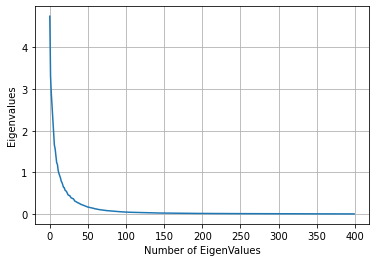

In [ ]:
pca = PCA()
x_transformed = pca.fit(x_train)
X_centered = x_train - np.mean(x_train, axis=0)
cov_matrix = np.dot(X_centered.T, X_centered) / x_train.shape[0]
eigenvalues = pca.explained_variance_
plt.plot(eigenvalues)
plt.xlabel('Number of EigenValues')
plt.ylabel('Eigenvalues')
plt.grid()

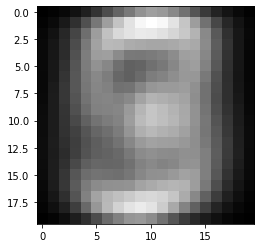

In [ ]:
mean = np.mean(x_train,axis=0).reshape(20,20).T
plt.imshow(mean,cmap='gray')

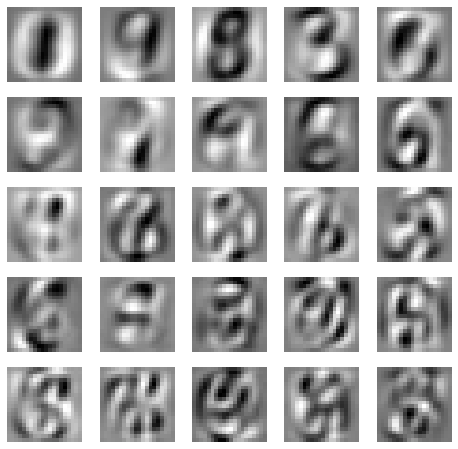

In [ ]:
f= plt.figure(figsize=[8,8])
for i in range(25):
    f.add_subplot(5,5,i+1)
    plt.imshow(pca.components_[i,:].reshape(20,20).T,cmap='gray')
    plt.axis('off')

In [ ]:
N = 1000
random = np.random.randint(1,high=200,size=N)+1

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
x_train_list = []
x_test_list = []
for i in range(N):
  x_train_list.append( x_train@pca.components_[0:random[i],:].T)
  x_test_list.append( x_test@pca.components_[0:random[i],:].T)

In [ ]:
accuracy= np.zeros(N)
for i in range(N):
  clf = GaussianNB()
  clf.fit(x_train_list[i],y_train.ravel())
  clf.predict(x_test_list[i])
  accuracy[i] = clf.score(x_test_list[i],y_test.ravel())
  #print("Number of components {}, accuracy {}".format(random[i],clf.score(x_test_list[i],y_test.ravel())))

Text(0.5, 1.0, 'Test Set')

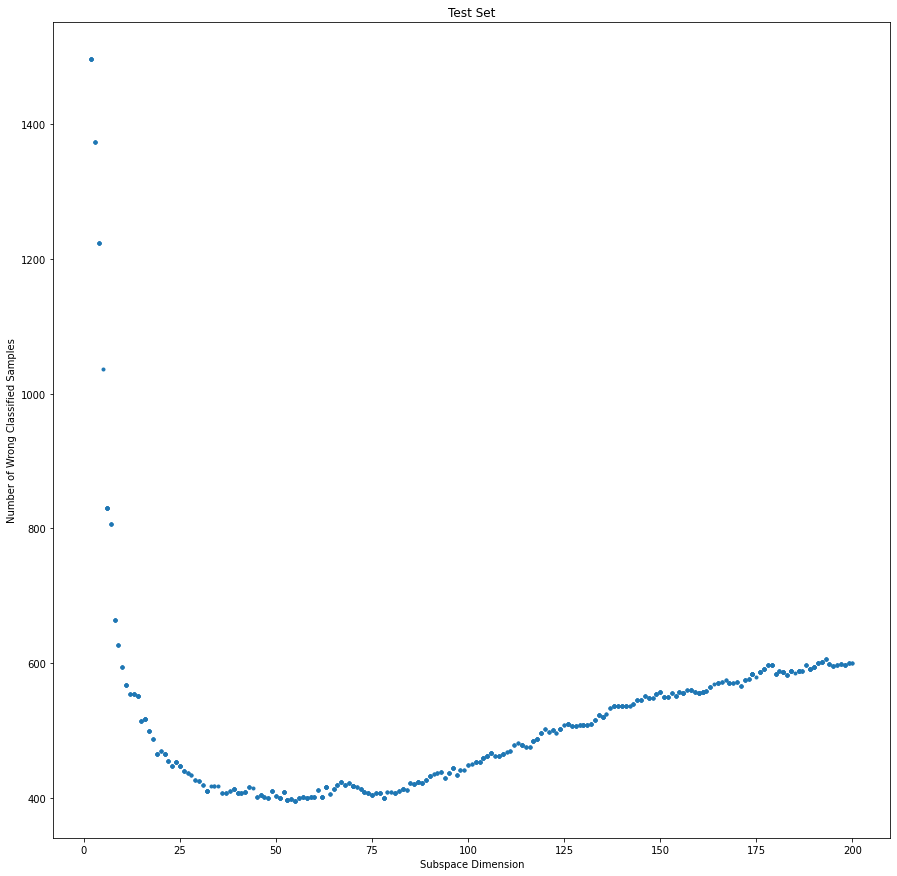

In [ ]:
classification_error1= (1-accuracy)*2500
ff1= plt.figure(figsize=[15,15])
plt.plot(random,classification_error1,'.')
plt.xlabel("Subspace Dimension")
plt.ylabel("Number of Wrong Classified Samples")
plt.title("Test Set")

Text(0.5, 1.0, 'Train Set')

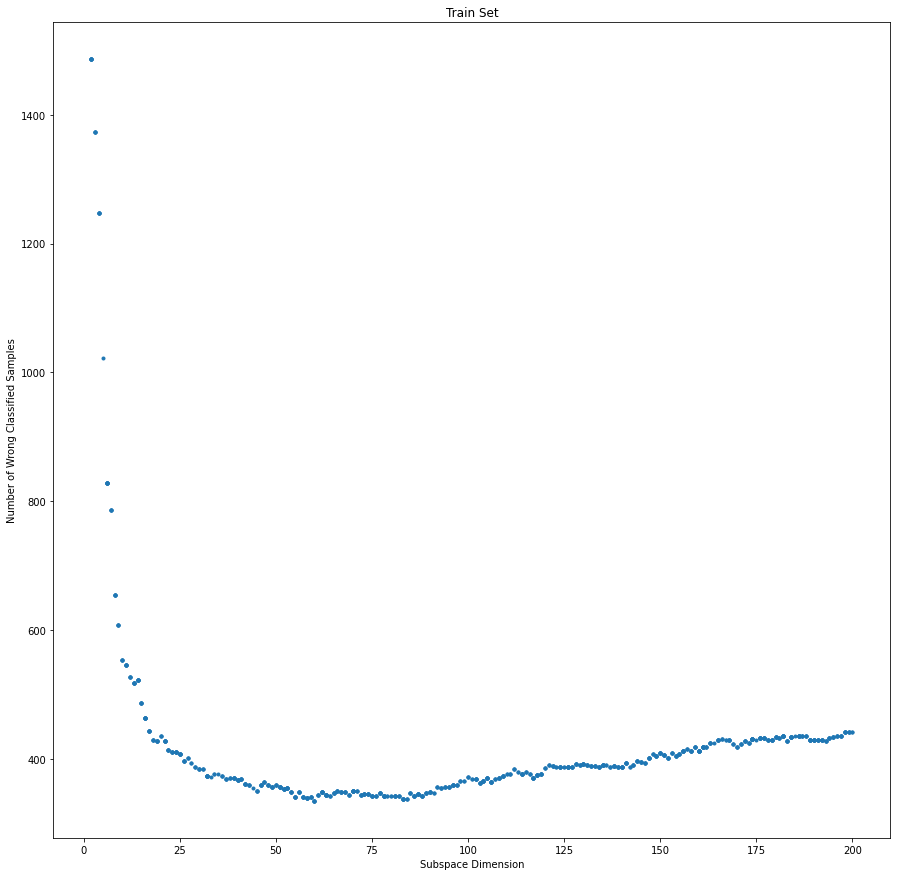

In [ ]:
accuracy3= np.zeros(N)
for i in range(N):
  clf = GaussianNB()
  clf.fit(x_train_list[i],y_train.ravel())
  clf.predict(x_train_list[i])
  accuracy3[i] = clf.score(x_train_list[i],y_train.ravel())
  #print("Number of components {}, accuracy {}".format(random[i],clf.score(x_test_list[i],y_test.ravel())))

classification_error3= (1-accuracy3)*2500
fk3= plt.figure(figsize=[15,15])
plt.plot(random,classification_error3,'.')
plt.xlabel("Subspace Dimension")
plt.ylabel("Number of Wrong Classified Samples")
plt.title("Train Set")

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components= 10,solver="svd",store_covariance = True)
x_transformed_lda = lda.fit(x_train,y_train)
transform_matrix = lda.coef_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(400, 10 - 1) = 9 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


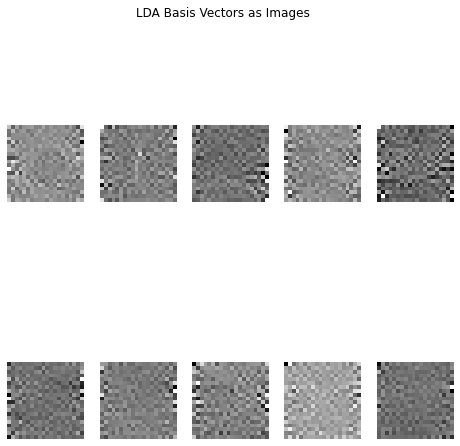

In [ ]:
fn = plt.figure(figsize=[8,8])
for i in range(10):
  fn.add_subplot(2,5,i+1)
  plt.imshow((transform_matrix[i]).reshape(20,20).T,cmap='gray')
  plt.axis("off")
  fn.suptitle("LDA Basis Vectors as Images")

In [ ]:
M = 10
random2 = np.arange(M)+1
random2

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
accuracy2= np.zeros(M)
for i in range(M):
  new_feature = x_train@transform_matrix[0:random2[i],:].T
  new_test = x_test@transform_matrix[0:random2[i],:].T
  clf = GaussianNB()
  clf.fit(new_feature,y_train.ravel())
  clf.predict(new_test)
  accuracy2[i] = clf.score(new_test,y_test.ravel())

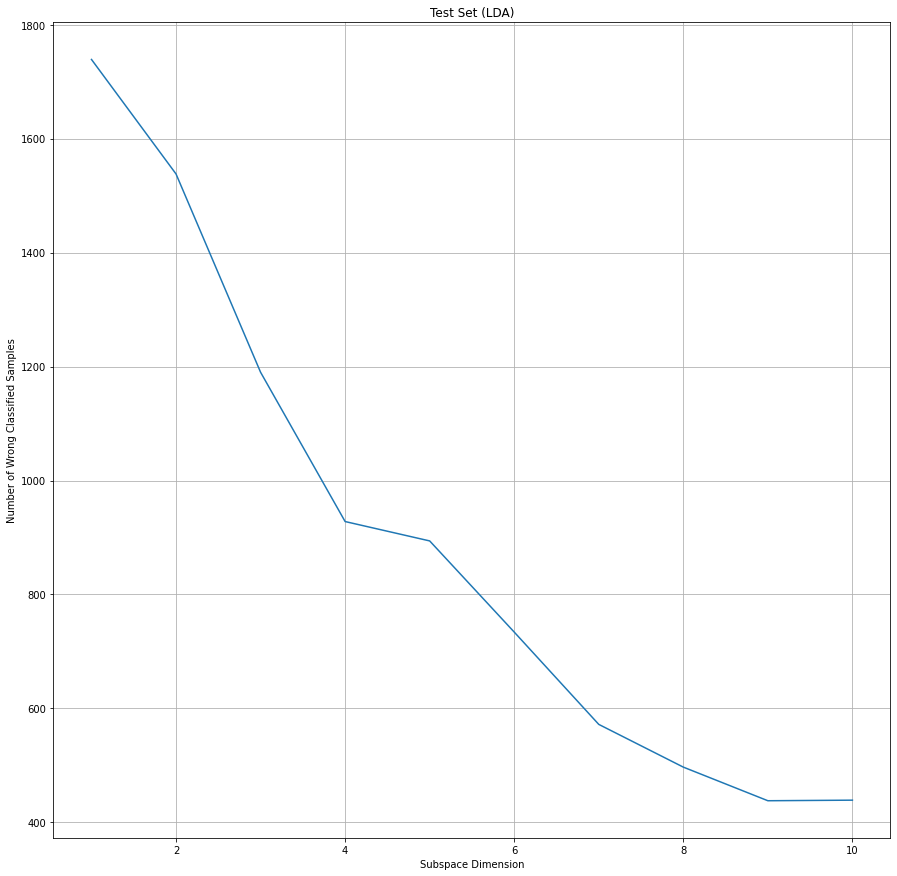

In [ ]:
classification_error2 = (1-accuracy2)*2500
ff2= plt.figure(figsize=[15,15])
plt.plot(random2, classification_error2)
plt.xlabel("Subspace Dimension")
plt.ylabel("Number of Wrong Classified Samples")
plt.title("Test Set (LDA)")
plt.grid()

In [ ]:
accuracy4= np.zeros(M)
for i in range(M):
  new_feature = x_train@transform_matrix[0:random2[i],:].T
  new_test = x_test@transform_matrix[0:random2[i],:].T
  clf = GaussianNB()
  clf.fit(new_feature,y_train.ravel())
  clf.predict(new_feature)
  accuracy4[i] = clf.score(new_feature,y_train.ravel())

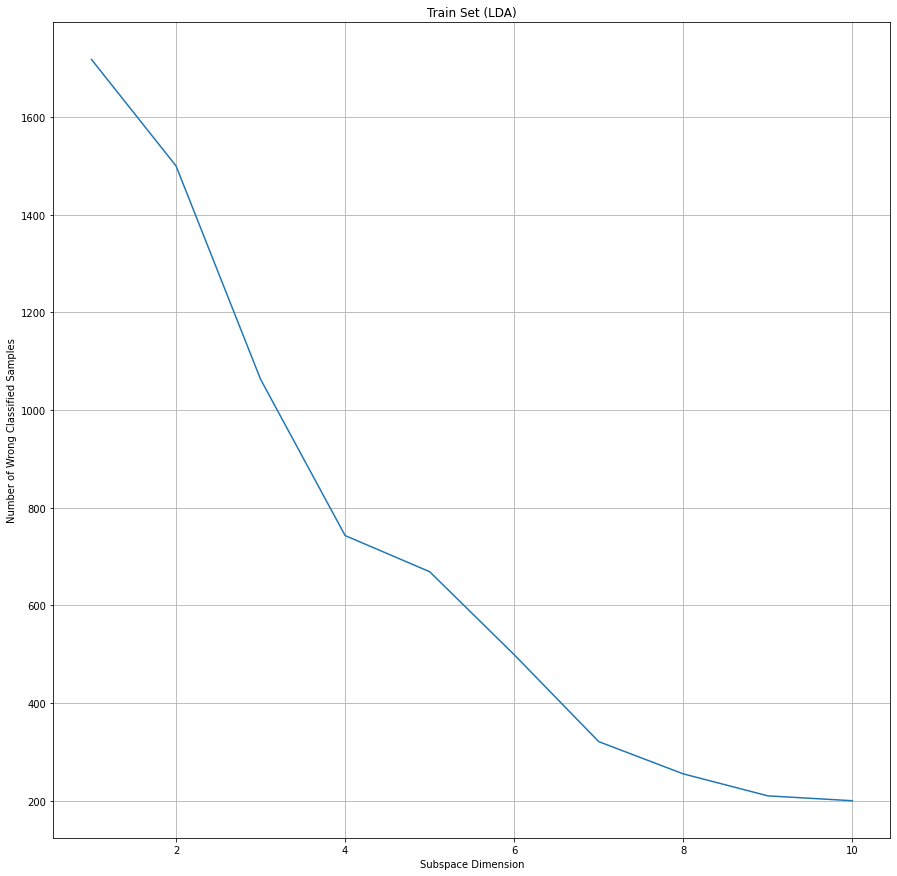

In [ ]:
classification_error4 = (1-accuracy4)*2500
fkf3= plt.figure(figsize=[15,15])
plt.plot(random2, classification_error4)
plt.xlabel("Subspace Dimension")
plt.ylabel("Number of Wrong Classified Samples")
plt.title("Train Set (LDA)")
plt.grid()

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne_transform_matrix= tsne.fit_transform(digits)

In [ ]:
length = len(tsne_transform_matrix)
tsne_x1 = []
tsne_x2 = []
for i in range(length):
  tsne_x1.append(tsne_transform_matrix[i][0])
  tsne_x2.append(tsne_transform_matrix[i][1])
 

In [ ]:
matrix_0_x=[]
matrix_0_y=[]
matrix_1_x=[]
matrix_1_y=[]
matrix_2_x=[]
matrix_2_y=[]
matrix_3_x=[]
matrix_3_y=[]
matrix_4_x=[]
matrix_4_y=[]
matrix_5_x=[]
matrix_5_y=[]
matrix_6_x=[]
matrix_6_y=[]
matrix_7_x=[]
matrix_7_y=[]
matrix_8_x=[]
matrix_8_y=[]
matrix_9_x=[]
matrix_9_y=[]

for i in range(length):
  if labels[i] == 0:
    matrix_0_x.append(tsne_x1[i])
    matrix_0_y.append(tsne_x2[i])
  elif labels[i] == 1:
    matrix_1_x.append(tsne_x1[i])
    matrix_1_y.append(tsne_x2[i])
  elif labels[i] == 2:
    matrix_2_x.append(tsne_x1[i])
    matrix_2_y.append(tsne_x2[i])
  elif labels[i] == 3:
    matrix_3_x.append(tsne_x1[i])
    matrix_3_y.append(tsne_x2[i])
  elif labels[i] == 4:
    matrix_4_x.append(tsne_x1[i])
    matrix_4_y.append(tsne_x2[i])
  elif labels[i] == 5:
    matrix_5_x.append(tsne_x1[i])
    matrix_5_y.append(tsne_x2[i])
  elif labels[i] == 6:
    matrix_6_x.append(tsne_x1[i])
    matrix_6_y.append(tsne_x2[i])
  elif labels[i] == 7:
    matrix_7_x.append(tsne_x1[i])
    matrix_7_y.append(tsne_x2[i])
  elif labels[i] == 8:
    matrix_8_x.append(tsne_x1[i])
    matrix_8_y.append(tsne_x2[i])
  else:
    matrix_9_x.append(tsne_x1[i])
    matrix_9_y.append(tsne_x2[i])

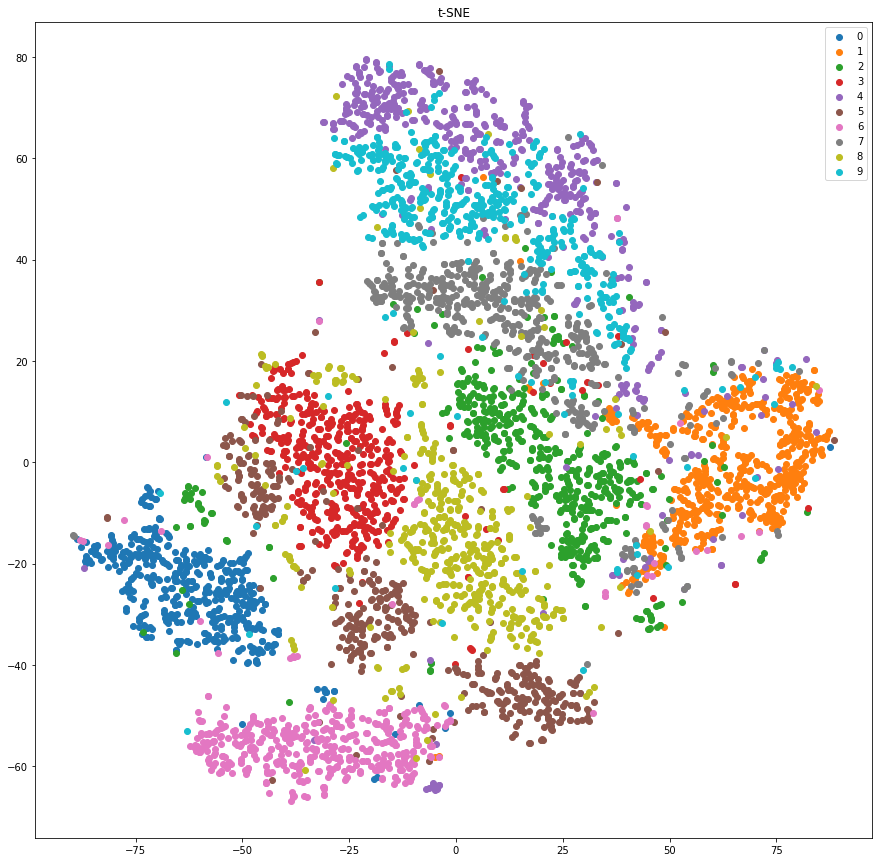

In [ ]:
f2= plt.figure(figsize=[15,15])
plt.scatter(matrix_0_x,matrix_0_y,label='0')
plt.scatter(matrix_1_x,matrix_1_y,label='1')
plt.scatter(matrix_2_x,matrix_2_y,label='2')
plt.scatter(matrix_3_x,matrix_3_y,label='3')
plt.scatter(matrix_4_x,matrix_4_y,label='4')
plt.scatter(matrix_5_x,matrix_5_y,label='5')
plt.scatter(matrix_6_x,matrix_6_y,label='6')
plt.scatter(matrix_7_x,matrix_7_y,label='7')
plt.scatter(matrix_8_x,matrix_8_y,label='8')
plt.scatter(matrix_9_x,matrix_9_y,label='9')
plt.title("t-SNE")
plt.legend()

In [ ]:
#This is a cited work beloning to Tom Pollard that is used directly from his Github repository. The reference is included in the report. 
def sammon(x, n, display = 2, inputdist = 'raw', maxhalves = 20, maxiter = 500, tolfun = 1e-9, init = 'default'):

    import numpy as np 
    from scipy.spatial.distance import cdist

    """Perform Sammon mapping on dataset x
    y = sammon(x) applies the Sammon nonlinear mapping procedure on
    multivariate data x, where each row represents a pattern and each column
    represents a feature.  On completion, y contains the corresponding
    co-ordinates of each point on the map.  By default, a two-dimensional
    map is created.  Note if x contains any duplicated rows, SAMMON will
    fail (ungracefully). 
    [y,E] = sammon(x) also returns the value of the cost function in E (i.e.
    the stress of the mapping).
    An N-dimensional output map is generated by y = sammon(x,n) .
    A set of optimisation options can be specified using optional
    arguments, y = sammon(x,n,[OPTS]):
       maxiter        - maximum number of iterations
       tolfun         - relative tolerance on objective function
       maxhalves      - maximum number of step halvings
       input          - {'raw','distance'} if set to 'distance', X is 
                        interpreted as a matrix of pairwise distances.
       display        - 0 to 2. 0 least verbose, 2 max verbose.
       init           - {'pca', 'cmdscale', random', 'default'}
                        default is 'pca' if input is 'raw', 
                        'msdcale' if input is 'distance'
    The default options are retrieved by calling sammon(x) with no
    parameters.
    File        : sammon.py
    Date        : 18 April 2014
    Authors     : Tom J. Pollard (tom.pollard.11@ucl.ac.uk)
                : Ported from MATLAB implementation by 
                  Gavin C. Cawley and Nicola L. C. Talbot
    Description : Simple python implementation of Sammon's non-linear
                  mapping algorithm [1].
    References  : [1] Sammon, John W. Jr., "A Nonlinear Mapping for Data
                  Structure Analysis", IEEE Transactions on Computers,
                  vol. C-18, no. 5, pp 401-409, May 1969.
    Copyright   : (c) Dr Gavin C. Cawley, November 2007.
    This program is free software; you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation; either version 2 of the License, or
    (at your option) any later version.
    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.
    You should have received a copy of the GNU General Public License
    along with this program; if not, write to the Free Software
    Foundation, Inc., 59 Temple Place, Suite 330, Boston, MA 02111-1307 USA
    """

    # Create distance matrix unless given by parameters
    if inputdist == 'distance':
        D = x
        if init == 'default':
            init = 'cmdscale'
    else:
        D = cdist(x, x)
        if init == 'default':
            init = 'pca'

    if inputdist == 'distance' and init == 'pca':
        raise ValueError("Cannot use init == 'pca' when inputdist == 'distance'")

    if np.count_nonzero(np.diagonal(D)) > 0:
        raise ValueError("The diagonal of the dissimilarity matrix must be zero")

    # Remaining initialisation
    N = x.shape[0]
    scale = 0.5 / D.sum()
    D = D + np.eye(N)     

    if np.count_nonzero(D<=0) > 0:
        raise ValueError("Off-diagonal dissimilarities must be strictly positive")   

    Dinv = 1 / D
    if init == 'pca':
        [UU,DD,_] = np.linalg.svd(x)
        y = UU[:,:n]*DD[:n] 
    elif init == 'cmdscale':
        from cmdscale import cmdscale
        y,e = cmdscale(D)
        y = y[:,:n]
    else:
        y = np.random.normal(0.0,1.0,[N,n])
    one = np.ones([N,n])
    d = cdist(y,y) + np.eye(N)
    dinv = 1. / d
    delta = D-d 
    E = ((delta**2)*Dinv).sum() 

    # Get on with it
    for i in range(maxiter):

        # Compute gradient, Hessian and search direction (note it is actually
        # 1/4 of the gradient and Hessian, but the step size is just the ratio
        # of the gradient and the diagonal of the Hessian so it doesn't
        # matter).
        delta = dinv - Dinv
        deltaone = np.dot(delta,one)
        g = np.dot(delta,y) - (y * deltaone)
        dinv3 = dinv ** 3
        y2 = y ** 2
        H = np.dot(dinv3,y2) - deltaone - np.dot(2,y) * np.dot(dinv3,y) + y2 * np.dot(dinv3,one)
        s = -g.flatten(order='F') / np.abs(H.flatten(order='F'))
        y_old    = y

        # Use step-halving procedure to ensure progress is made
        for j in range(maxhalves):
            s_reshape = np.reshape(s, (-1,n),order='F')
            y = y_old + s_reshape
            d = cdist(y, y) + np.eye(N)
            dinv = 1 / d
            delta = D - d
            E_new = ((delta**2)*Dinv).sum()
            if E_new < E:
                break
            else:
                s = 0.5*s

        # Bomb out if too many halving steps are required
        if j == maxhalves-1:
            print('Warning: maxhalves exceeded. Sammon mapping may not converge...')

        # Evaluate termination criterion
        if abs((E - E_new) / E) < tolfun:
            if display:
                print('TolFun exceeded: Optimisation terminated')
            break

        # Report progress
        E = E_new
        if display > 1:
            tt=1
            #print('epoch = %d : E = %12.10f'% (i+1, E * scale))

    if i == maxiter-1:
        print('Warning: maxiter exceeded. Sammon mapping may not have converged...')

    # Fiddle stress to match the original Sammon paper
    E = E * scale
    
    return [y,E]

In [ ]:
s = sammon(digits,2)

In [ ]:
sammon_transform_matrix = s[0]

In [ ]:
length = len(sammon_transform_matrix)
sammon_x1 = []
sammon_x2 = []
for i in range(length):
  sammon_x1.append(sammon_transform_matrix[i][0])
  sammon_x2.append(sammon_transform_matrix[i][1])

matrix_0_x=[]
matrix_0_y=[]
matrix_1_x=[]
matrix_1_y=[]
matrix_2_x=[]
matrix_2_y=[]
matrix_3_x=[]
matrix_3_y=[]
matrix_4_x=[]
matrix_4_y=[]
matrix_5_x=[]
matrix_5_y=[]
matrix_6_x=[]
matrix_6_y=[]
matrix_7_x=[]
matrix_7_y=[]
matrix_8_x=[]
matrix_8_y=[]
matrix_9_x=[]
matrix_9_y=[]

for i in range(length):
  if labels[i] == 0:
    matrix_0_x.append(sammon_x1[i])
    matrix_0_y.append(sammon_x2[i])
  elif labels[i] == 1:
    matrix_1_x.append(sammon_x1[i])
    matrix_1_y.append(sammon_x2[i])
  elif labels[i] == 2:
    matrix_2_x.append(sammon_x1[i])
    matrix_2_y.append(sammon_x2[i])
  elif labels[i] == 3:
    matrix_3_x.append(sammon_x1[i])
    matrix_3_y.append(sammon_x2[i])
  elif labels[i] == 4:
    matrix_4_x.append(sammon_x1[i])
    matrix_4_y.append(sammon_x2[i])
  elif labels[i] == 5:
    matrix_5_x.append(sammon_x1[i])
    matrix_5_y.append(sammon_x2[i])
  elif labels[i] == 6:
    matrix_6_x.append(sammon_x1[i])
    matrix_6_y.append(sammon_x2[i])
  elif labels[i] == 7:
    matrix_7_x.append(sammon_x1[i])
    matrix_7_y.append(sammon_x2[i])
  elif labels[i] == 8:
    matrix_8_x.append(sammon_x1[i])
    matrix_8_y.append(sammon_x2[i])
  else:
    matrix_9_x.append(sammon_x1[i])
    matrix_9_y.append(sammon_x2[i])

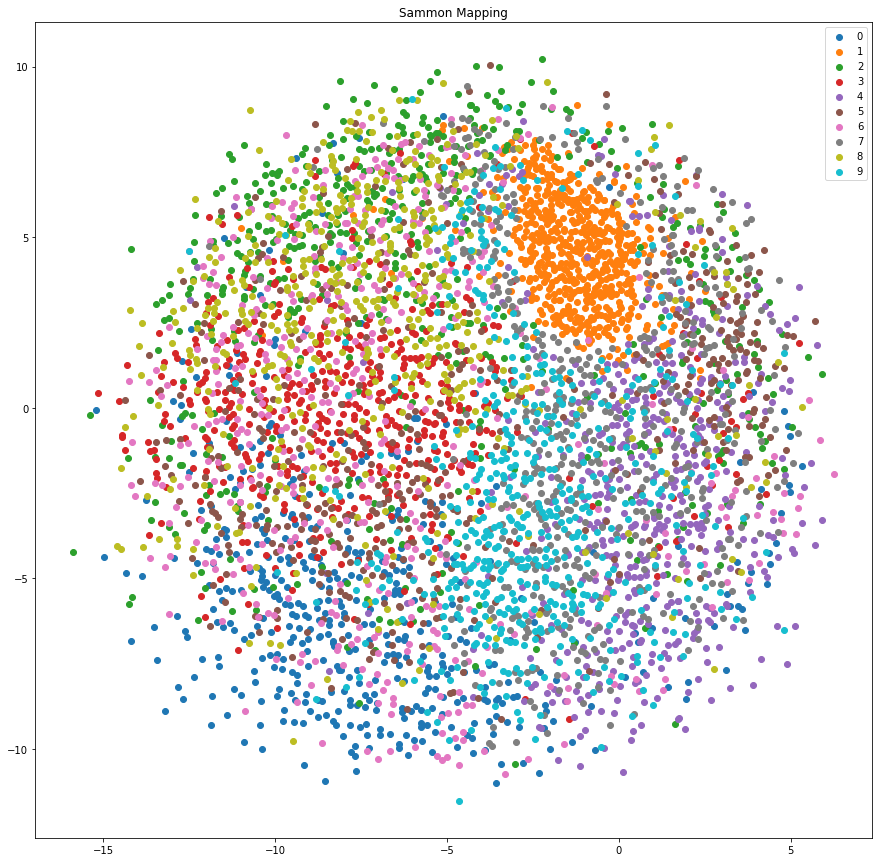

In [ ]:
f3= plt.figure(figsize=[15,15])
plt.scatter(matrix_0_x,matrix_0_y,label='0')
plt.scatter(matrix_1_x,matrix_1_y,label='1')
plt.scatter(matrix_2_x,matrix_2_y,label='2')
plt.scatter(matrix_3_x,matrix_3_y,label='3')
plt.scatter(matrix_4_x,matrix_4_y,label='4')
plt.scatter(matrix_5_x,matrix_5_y,label='5')
plt.scatter(matrix_6_x,matrix_6_y,label='6')
plt.scatter(matrix_7_x,matrix_7_y,label='7')
plt.scatter(matrix_8_x,matrix_8_y,label='8')
plt.scatter(matrix_9_x,matrix_9_y,label='9')
plt.title("Sammon Mapping")
plt.legend()